# 트리

- 노드와 가지로 구성된 데이터 사이의 계층 관계를 표현하는 구조


## 트리 구조와 용어
- 루트: 트리의 가장 위쪽에 있는 노드, 트리 1개당 1개만 존재
- 가장 아래쪽에 있는 노드, 단말 노드, 외부 노드라고도 불림
- 비단말노드: 리프를 제외한 노드
- 자식: 어떤 노드와 가지가 연결되었을 때 아래쪽 노드
- 부모: 어떤 노드와 가지가 연결되었을 때 위쪽 노드
- 형제: 부모가 같은 노드
- 조상: 어떤 노드에서 위쪽으로 가지를 따라가면 만나는 모든 노드
- 자손: 어떤 노드에서 아래쪽으로 가지를 따라가면 만나는 모든 노드
- 레벨: 루트에서 얼마나 멀리 떠어져 있는지 나타내는 것, 가장 위쪽에 있는 루트의 레빌이 0, 가지가 하나씩 뻗어 내려갈 때마다 1씩 증가
- 차수: 각 노드가 갖는 자식의 수
- 높이: 루트에서 가장 멀리 있는 리프까지의 거리
- 서브트리: 어떤 노드를 루트로 하고, 그 자손으로 구성된 트리
- 빈트리: 노드와 가지가 전혀 없는 트리, 빈트리 또는 널트리 라고함

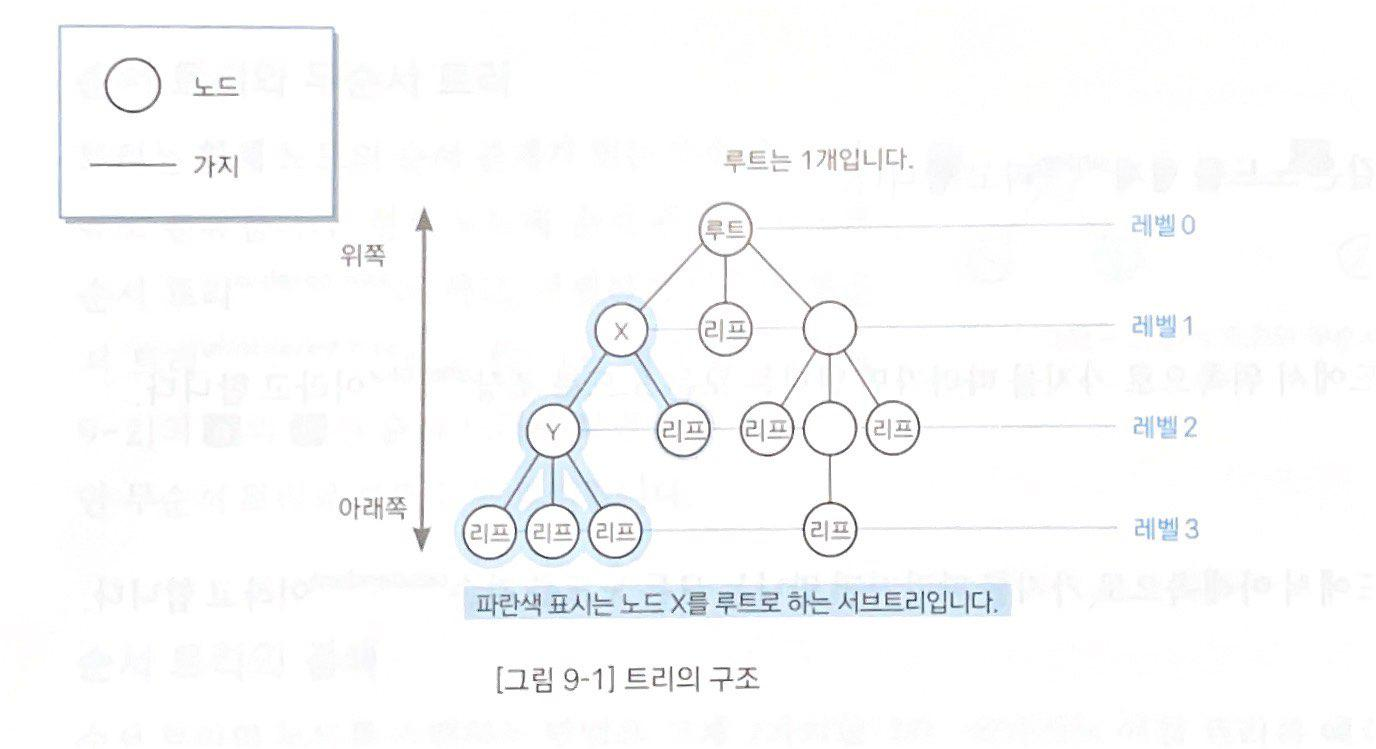

In [ ]:
# 이진 검색 트리 구현하기

from __future__ import annotations
from typing import Any, Type

class Node:
  """이진 검색 트리의 노드"""
  def __init__(self, key: Any, value: Any, left: Node = None, right: Node = None):
    """생성자(constructor)"""
    self.key = key        # 키
    self.value = value    # 값
    self.left = left      # 왼쪽 포인터
    self.right = right    # 오른쪽 포인터

class BInarySearchTree:
  """이진 검색 트리"""

  def __init__(self):
    """초기화"""
    self.root = None      # 루트

  def search(self, key: Any) -> Any:
    """키가 key인 노드를 검색"""
    p = self.root         # 루트에 주목
    while True:
      if p is None:       # 더 이상 진행할 수 없으면
        return None       # 검색 실패
      if key == p.key:    # key와 노드 p의 키가 같으면
        return p.value    # 검색 성공
      elif key < p.key:   # key 쪽이 작으면
        p = p.left        # 왼쪽 서브트리에서 검색
      else:               # key 쪽이 크면
        p = p.right       # 오른쪽 서브트리에서 검색

  def add(self, key: Any, value: Any) -> bool:
    """키가 key이고 값이 value인 노드를 삽입"""

    def add_node(node: Node, key: Any, value: Any) -> None:
      """node를 루트로 하는 서브트리에 키가 key이고 값이 value인 노드를 삽입"""
      if key == node.key:
        return False      # key가 이진 검색 트리에 이미 존재
      elif key < node.key:
        if node.left is None:
          node.left = Node(key, value, None, None)
        else:
          add_node(node.left, key, value)
      else:
        if node.right is None:
          node.right = Node(key, value, None, None)
        else:
          add_node(node.right, key, value)
      return True
    
    if self.root is None:
      self.root = Node(key, value, None, None)
      return True
    else:
      return add_node(self.root, key, value)

  def remove(self, key: Any) -> bool:
    """키가 key인 노드를 삭제"""
    p = self.root         # 스캔 중인 노드
    parent = None         # 스캔 중인 노드의 부모 노드
    is_left_child = True  # p는 parent의 왼쪽 자식 노드인지 확인

    while True:
      if p is None:       # 더 이상 진행할 수 없으면
        return False      # 그 키는 존재하지 않음

      if key == p.key:    # key와 노드 p의 키가 같으면
        break             # 검색 성공
      else:
        parent = p                  # 가지를 내려가기 전에 부모를 설정
        if key < p.key:             # key 쪽이 작으면
          is_left_child = True      # 여기서 내려가는 것은 왼쪽 자식
          p = p.left                # 왼쪽 서브트리에서 검색
        else:                       # key 쪽이 크면
          is_left_chile = False     # 여기서 내려가는 것은 오른쪽 자식
          p = p.right               # 오른쪽 서브트리에서 검색

    if p.left is None:              # p에 왼쪽 자식이 없으면
      if p is self.root:
        self.root = p.right
      elif is_left_child:
        parent.left = p.right       # 부모의 왼쪽 포인터가 오른쪽 자식을 가리킴
      else:
        parent.right = p.right      # 부모의 오른쪽 포인터가 오른쪽 자식을 가리킴
    elif p.right is None:
      if p is self.root:
        self.root = p.left
      elif is_left_child:
        parent.left = p.left        # 부모의 왼쪽 포인터가 왼쪽 자식을 가리킴
      else:
        parent.right = p.left       # 부모의 오른쪽 포인터가 왼쪽 자식을 가리킴
    else:
      parent = p
      left = p.left                 # 서브 트리 안에서 가장 큰 노드
      is_left_child = True
      while left.right is not None: # 가장 큰 노드 left를 검색
        parent = left
        left = left.right
        is_left_child = False

      p.key = left.key              # left의 키를 p로 이동
      p.value = left.value          # left의 데이터를 p로 이동
      if is_left_child:
        parent.left = left.left     # left를 삭제
      else:
        parent.right = left.left    # left를 삭제
    return True

  def dump(self) -> None:
    """덤프(모든 노드를 키의 오름차순으로 출력)"""

    def print_subtree(node: Node):
      """node를 루트로 하는 서브트리의 노드를 키의 오름차순으로 출력"""
      if node is not None:
        print_subtree(node.left)    # 왼쪽 서브트리를 오름차순으로 출력
        print(f'{node.key} {node.value}') # node를 출력
        print_subtree(node.right)   # 오른쪽 서브트리를 오름차순으로 출력
    
    print_subtree(self.root)

  def min_key(self) -> Any:
    """가장 작은 키"""
    if self.root is None:
      return None
    p = self.root
    while p.left is not None:
      p = p.left
    return p.key

  def max_key(self) -> Any:
    """가장 큰 키"""
    if self.root is None:
      return None
    p = self.root
    while p.right is not None:
      p = p.right
    return p.key

In [ ]:
# 이진 검색 트리 구현하기(내림차순으로 덤프 추가)

from __future__ import annotations
from typing import Any, Type

class Node:
  """이진 검색 트리의 노드"""
  def __init__(self, key: Any, value: Any, left: Node = None, right: Node = None):
    """생성자(constructor)"""
    self.key = key        # 키
    self.value = value    # 값
    self.left = left      # 왼쪽 포인터
    self.right = right    # 오른쪽 포인터

class BInarySearchTree:
  """이진 검색 트리"""

  def __init__(self):
    """초기화"""
    self.root = None      # 루트

  def search(self, key: Any) -> Any:
    """키가 key인 노드를 검색"""
    p = self.root         # 루트에 주목
    while True:
      if p is None:       # 더 이상 진행할 수 없으면
        return None       # 검색 실패
      if key == p.key:    # key와 노드 p의 키가 같으면
        return p.value    # 검색 성공
      elif key < p.key:   # key 쪽이 작으면
        p = p.left        # 왼쪽 서브트리에서 검색
      else:               # key 쪽이 크면
        p = p.right       # 오른쪽 서브트리에서 검색

  def add(self, key: Any, value: Any) -> bool:
    """키가 key이고 값이 value인 노드를 삽입"""

    def add_node(node: Node, key: Any, value: Any) -> None:
      """node를 루트로 하는 서브트리에 키가 key이고 값이 value인 노드를 삽입"""
      if key == node.key:
        return False      # key가 이진 검색 트리에 이미 존재
      elif key < node.key:
        if node.left is None:
          node.left = Node(key, value, None, None)
        else:
          add_node(node.left, key, value)
      else:
        if node.right is None:
          node.right = Node(key, value, None, None)
        else:
          add_node(node.right, key, value)
      return True
    
    if self.root is None:
      self.root = Node(key, value, None, None)
      return True
    else:
      return add_node(self.root, key, value)

  def remove(self, key: Any) -> bool:
    """키가 key인 노드를 삭제"""
    p = self.root         # 스캔 중인 노드
    parent = None         # 스캔 중인 노드의 부모 노드
    is_left_child = True  # p는 parent의 왼쪽 자식 노드인지 확인

    while True:
      if p is None:       # 더 이상 진행할 수 없으면
        return False      # 그 키는 존재하지 않음

      if key == p.key:    # key와 노드 p의 키가 같으면
        break             # 검색 성공
      else:
        parent = p                  # 가지를 내려가기 전에 부모를 설정
        if key < p.key:             # key 쪽이 작으면
          is_left_child = True      # 여기서 내려가는 것은 왼쪽 자식
          p = p.left                # 왼쪽 서브트리에서 검색
        else:                       # key 쪽이 크면
          is_left_child = False     # 여기서 내려가는 것은 오른쪽 자식
          p = p.right               # 오른쪽 서브트리에서 검색

    if p.left is None:              # p에 왼쪽 자식이 없으면
      if p is self.root:
        self.root = p.right
      elif is_left_child:
        parent.left = p.right       # 부모의 왼쪽 포인터가 오른쪽 자식을 가리킴
      else:
        parent.right = p.right      # 부모의 오른쪽 포인터가 오른쪽 자식을 가리킴
    elif p.right is None:
      if p is self.root:
        self.root = p.left
      elif is_left_child:
        parent.left = p.left        # 부모의 왼쪽 포인터가 왼쪽 자식을 가리킴
      else:
        parent.right = p.left       # 부모의 오른쪽 포인터가 왼쪽 자식을 가리킴
    else:
      parent = p
      left = p.left                 # 서브 트리 안에서 가장 큰 노드
      is_left_child = True
      while left.right is not None: # 가장 큰 노드 left를 검색
        parent = left
        left = left.right
        is_left_child = False

      p.key = left.key              # left의 키를 p로 이동
      p.value = left.value          # left의 데이터를 p로 이동
      if is_left_child:
        parent.left = left.left     # left를 삭제
      else:
        parent.right = left.left    # left를 삭제
    return True

  def dump(self, reverse = False) -> None:
    """덤프(모든 노드를 키의 오름차순으로 출력)"""

    def print_subtree(node: Node):
      """node를 루트로 하는 서브트리의 노드를 키의 오름차순으로 출력"""
      if node is not None:
        print_subtree(node.left)    # 왼쪽 서브트리를 오름차순으로 출력
        print(f'{node.key} {node.value}') # node를 출력
        print_subtree(node.right)   # 오른쪽 서브트리를 오름차순으로 출력

    def print_subtree_rev(node: Node):
      """node를 루트로 하는 서브트리의 노드를 키의 내림차순으로 출력"""
      if node is not None:
        print_subtree_rev(node.right)       # 오른쪽 서브트리를 내림차순으로 출력
        print(f'{node.key} {node.value}')   # node를 출력
        print_subtree_rev(node.right)       # 왼쪽 서브트리를 내림차순으로 출력
    
    print_subtree_rev(self.root) if reverse else print_subtree(self.root)

  def min_key(self) -> Any:
    """가장 작은 키"""
    if self.root is None:
      return None
    p = self.root
    while p.left is not None:
      p = p.left
    return p.key

  def max_key(self) -> Any:
    """가장 큰 키"""
    if self.root is None:
      return None
    p = self.root
    while p.right is not None:
      p = p.right
    return p.key

In [1]:
%cd /content/drive/MyDrive/colab/algorithm

/content/drive/MyDrive/colab/algorithm


In [2]:
# 이진 검색 트리 클래스 BinarySearchTree 사용하기

from enum import Enum
from bst import BinarySearchTree

Menu = Enum('Menu',['삽입','삭제','검색','덤프','키의범위','종료'])

def select_Menu() -> Menu:
  """메뉴선택"""
  s = [f'({m.value}){m.name}' for m in Menu]
  while True:
    print(*s, sep = ' ', end= '')
    n = int(input(': '))
    if 1 <= n <= len(Menu):
      return Menu(n)

tree = BinarySearchTree()           # 이진 검색 트리를 생성

while True:
  menu = select_Menu()              # 메뉴 선택

  if menu == Menu.삽입:
    key = int(input('삽입할 키를 입력하세요.: '))
    val = input('삽입할 값을 입력하세요.: ')
    if not tree.add(key, val):
      print('삽입에 실패했습니다!')
  
  elif menu == Menu.삭제:
    key = int(input('삭제할 키를 입력하세요.: '))
    tree.remove(key)

  elif menu == Menu.검색:
    key = int(input('검색할 키를 입력하세요.: '))
    t = tree.search(key)
    if t is not None:
      print(f'이 키를 갖는 값은 {t}입니다.')
    else:
      print('해당하는 데이터가 없습니다.')

  elif menu == Menu.덤프:
    tree.dump()

  elif menu == Menu.키의범위:       # 키의 범위(최솟값과 최댓값)
    print(f'키의 최솟값은 {tree.min_key()}입니다.')
    print(f'키의 최댓값은 {tree.max_key()}입니다.')
  
  else:
    break

(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 1
삽입할 키를 입력하세요.: 1
삽입할 값을 입력하세요.: 수연
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 1
삽입할 키를 입력하세요.: 10
삽입할 값을 입력하세요.: 예지
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 1
삽입할 키를 입력하세요.: 5
삽입할 값을 입력하세요.: 동혁
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 1
삽입할 키를 입력하세요.: 12
삽입할 값을 입력하세요.: 원준
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 1
삽입할 키를 입력하세요.: 14
삽입할 값을 입력하세요.: 민서
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 3
검색할 키를 입력하세요.: 5
이 키를 갖는 값은 동혁입니다.
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 4
1 수연
5 동혁
10 예지
12 원준
14 민서
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 2
삭제할 키를 입력하세요.: 12
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 4
1 수연
5 동혁
10 예지
14 민서
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 5
키의 최솟값은 1입니다.
키의 최댓값은 14입니다.
(1)삽입 (2)삭제 (3)검색 (4)덤프 (5)키의범위 (6)종료: 6
